In [1]:
# project: p13
# submitter: Smwells3
# partner: none

In [2]:
import time, requests, os, sqlite3, math, collections, copy, json
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from collections import defaultdict

In [3]:
def download(filename, url):
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    r = requests.get(url)
    urltxt = r.text
    f = open(filename, "w")
    f.write(urltxt)
    f.close()
    return (str(filename) + " created!")

In [4]:
download("countries.json", "https://raw.githubusercontent.com/msyamkumar/cs220-f20-projects/master/p13/countries.json")

'countries.json already exists!'

In [5]:
countries = pd.read_json("countries.json")
countries.head()

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA


In [6]:
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)

In [7]:
#q1
regions = pd.read_sql("""
SELECT region, COUNT(country) as `number of countries`
FROM countries
GROUP BY region
ORDER BY `number of countries` DESC, region 
            """, conn)
regions

,region,number of countries
0,SUB-SAHARAN AFRICA,42
1,LATIN AMER. & CARIB,33
2,WESTERN EUROPE,22
3,ASIA (EX. NEAR EAST),21
4,NEAR EAST,13
5,C.W. OF IND. STATES,12
6,OCEANIA,12
7,EASTERN EUROPE,8
8,NORTHERN AFRICA,5
9,BALTICS,3


Text(0, 0.5, 'number of countries')

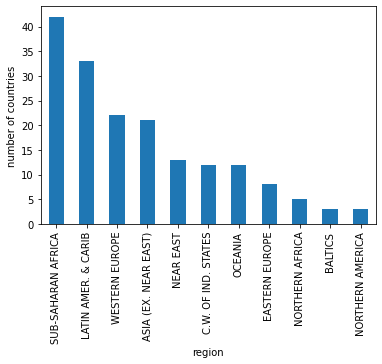

In [8]:
#q2
regions = regions.set_index("region")
ax = regions.plot.bar(legend = False)
ax.set_xlabel("region")
ax.set_ylabel("number of countries")

In [9]:
#q3
area_regions = pd.read_sql("""
SELECT region, SUM(area) as `total area`
FROM countries
GROUP BY region
ORDER BY `total area` DESC, region 
            """, conn)
area_regions

,region,total area
0,ASIA (EX. NEAR EAST),22177295
1,C.W. OF IND. STATES,22100843
2,LATIN AMER. & CARIB,20426877
3,NORTHERN AMERICA,19616143
4,SUB-SAHARAN AFRICA,19446660
5,OCEANIA,8488612
6,NORTHERN AFRICA,5752890
7,NEAR EAST,4340116
8,WESTERN EUROPE,3707838
9,EASTERN EUROPE,938554


Text(0, 0.5, 'total area')

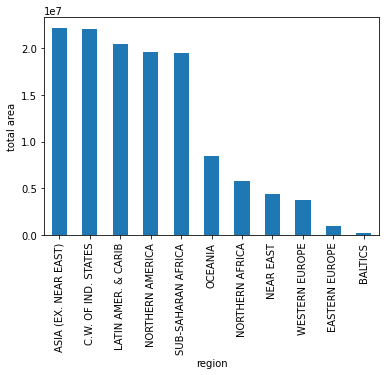

In [10]:
#q4
area_regions = area_regions.set_index("region")
ax = area_regions.plot.bar(legend = False)
ax.set_xlabel("region")
ax.set_ylabel("total area")

In [11]:
#q5
near_east = pd.read_sql("""
SELECT country, area
FROM countries
WHERE region = "NEAR EAST"
ORDER BY area DESC
            """, conn)
near_east

,country,area
0,Saudi Arabia,1960582
1,Turkey,780580
2,Yemen,527970
3,Iraq,437072
4,Oman,212460
5,Syria,185180
6,Jordan,92300
7,United Arab Emirates,82880
8,Israel,20770
9,Kuwait,17820


In [12]:
#q6
gdp_countries = pd.read_sql("""
SELECT country, population * `gdp-per-capita` as `real GDP(billion)`
FROM countries
ORDER BY `real GDP(billion)` DESC
            """, conn)
gdp_countries[:12]

,country,real GDP(billion)
0,United States,11281191327000
1,China,6569868565000
2,Japan,3594473830200
3,India,3176520785500
4,Germany,2274855452400
5,France,1680181353600
6,United Kingdom,1678873538100
7,Italy,1552164690300
8,Brazil,1429394525200
9,Russia,1271752506000


Text(0, 0.5, 'real GDP(billion)')

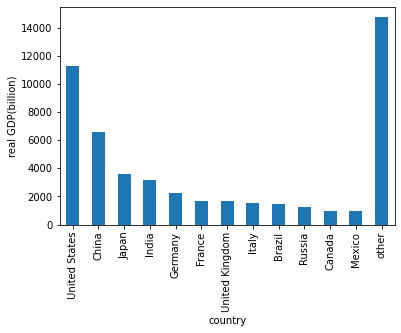

In [13]:
#q7
gdp_countries = gdp_countries.set_index("country")
countries_gdp = gdp_countries["real GDP(billion)"].iloc[:12]
other_sum = gdp_countries["real GDP(billion)"].iloc[12:].sum()
countries_gdp["other"] = other_sum
ax = (countries_gdp/1000000000).plot.bar(legend = False)
ax.set_xlabel("country")
ax.set_ylabel("real GDP(billion)")

<AxesSubplot:xlabel='gdp-per-capita', ylabel='literacy'>

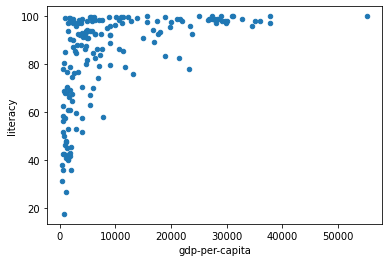

In [14]:
#q8
gdp_literacy = pd.read_sql("""
SELECT country, `gdp-per-capita`, literacy
FROM countries
            """, conn)
def decimalfy(string):
    decimal = int(string[-1])
    whole = int(string[:-2]) * 10
    number = (whole + decimal)/10
    return number
literacy_series = Series(gdp_literacy["literacy"])
literacy_series = literacy_series.apply(decimalfy)
literacy_gdp = DataFrame(literacy_series)
literacy_gdp["country"] = gdp_literacy["country"]
literacy_gdp["gdp-per-capita"] = gdp_literacy["gdp-per-capita"]
literacy_gdp.plot.scatter(x="gdp-per-capita", y="literacy")

In [15]:
#q9
literacy_gdp.corr()["gdp-per-capita"]["literacy"]

0.5154347345101354

<AxesSubplot:xlabel='gdp-per-capita', ylabel='phones'>

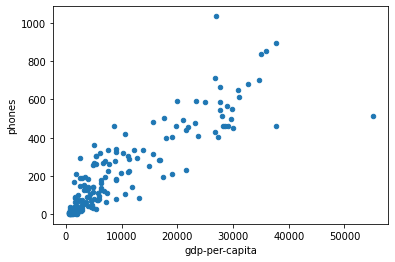

In [16]:
#q10
gdp_phones = pd.read_sql("""
SELECT country, `gdp-per-capita`, phones
FROM countries
            """, conn)
phones_series = Series(gdp_phones["phones"])
phones_series = phones_series.apply(decimalfy)
phones_gdp = DataFrame(phones_series)
phones_gdp["country"] = gdp_phones["country"]
phones_gdp["gdp-per-capita"] = gdp_phones["gdp-per-capita"]
phones_gdp.plot.scatter(x="gdp-per-capita", y="phones")

<AxesSubplot:xlabel='gdp-per-capita', ylabel='infant-mortality'>

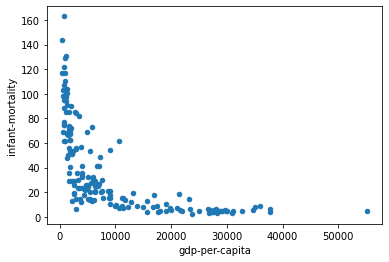

In [17]:
#q11
gdp_infant = pd.read_sql("""
SELECT country, `gdp-per-capita`, `infant-mortality`
FROM countries
            """, conn)

gdp_infant.plot.scatter(x="gdp-per-capita", y="infant-mortality")

<AxesSubplot:xlabel='gdp-per-capita', ylabel='infant-mortality'>

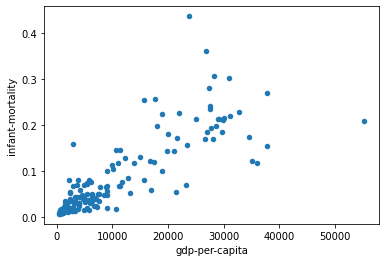

In [18]:
#q12
def inverse(number):
    return 1 / number
infant_series = Series(gdp_infant["infant-mortality"])
infant_series = infant_series.apply(inverse)
infant_gdp = DataFrame(infant_series)
infant_gdp["country"] = gdp_infant["country"]
infant_gdp["gdp-per-capita"] = gdp_infant["gdp-per-capita"]
infant_gdp.plot.scatter(x="gdp-per-capita", y="infant-mortality")

In [19]:
#q13
phones_gdp["1"] = 1
res = np.linalg.lstsq(phones_gdp[["gdp-per-capita", "1"]], phones_gdp["phones"], rcond=None)
# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
(m,n)

(0.01808887883603978, 37.95908987837674)

In [20]:
#q14
30000 * m + n

580.6254549595701

<AxesSubplot:xlabel='gdp-per-capita', ylabel='phones'>

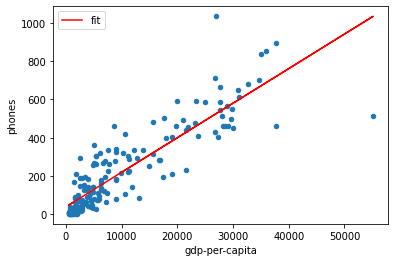

In [21]:
#q15
ax = phones_gdp.plot.scatter(x='gdp-per-capita', y='phones')
phones_gdp["fit"] = phones_gdp["gdp-per-capita"] * m + n
phones_gdp.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)

In [22]:
#q16
birth_death = pd.read_sql("""
SELECT country, `birth-rate` as birth, `death-rate` as death
FROM countries 
ORDER BY birth - death
LIMIT 15
            """, conn)
birth_death

,country,birth,death
0,Botswana,23.08,29.50
1,Ukraine,8.82,14.39
2,Russia,9.95,14.65
3,Bulgaria,9.65,14.27
4,Latvia,9.24,13.66
5,Lesotho,24.75,28.71
6,South Africa,18.20,22.00
7,Monaco,9.19,12.91
8,Hungary,9.72,13.11
9,Estonia,10.04,13.25


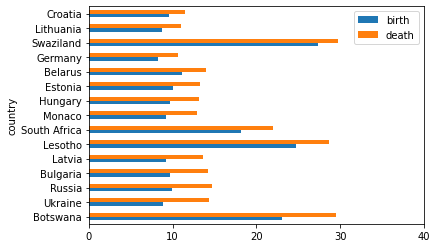

In [23]:
#q17
birth_death = birth_death.set_index("country")
ax = birth_death.plot.barh(xticks=[0,10,20,30,40])

<AxesSubplot:xlabel='population', ylabel='gdp-per-capita'>

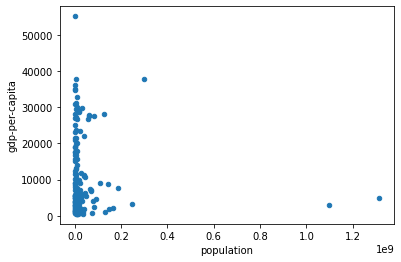

In [24]:
#q18
gdp_pop = pd.read_sql("""
SELECT country, population, `gdp-per-capita`
FROM countries 
            """, conn)
gdp_pop.plot.scatter(x="population", y="gdp-per-capita")

In [25]:
#q19
outliers = defaultdict(dict)
idx = 0
for country in range(len(gdp_pop)):
    population = gdp_pop.loc[country][1]
    gdp = gdp_pop.loc[country][2]
    if population > 280000000 or gdp > 40000:
        outliers["country"][idx] = gdp_pop.loc[country][0]
        outliers["population"][idx] = gdp_pop.loc[country][1]
        outliers["gdp-per-capita"][idx] = gdp_pop.loc[country][2]
        idx += 1
outliers = DataFrame(outliers)
outliers = outliers.sort_values("population", ascending=False)
outliers.reset_index(drop=True)
#sort taken from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,country,population,gdp-per-capita
0,China,1313973713,5000
1,India,1095351995,2900
2,United States,298444215,37800
3,Luxembourg,474413,55100


Text(0.5, 1.0, 'GDP Breakdown')

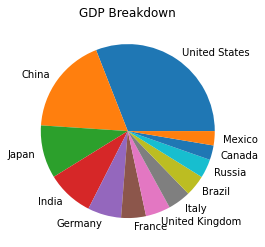

In [26]:
#q20
countries_gdp = countries_gdp[:12]
ax = countries_gdp.plot.pie()
ax.set_ylabel("")
ax.set_title("GDP Breakdown")

In [27]:
conn.close()

In [29]:
outliers = defaultdict(dict)
idx = 0
for country in range(len(gdp_pop)):
    population = gdp_pop.loc[country][1]
    gdp = gdp_pop.loc[country][2]
    if population > 280000000 or gdp > 40000:
        outliers["country"][idx] = gdp_pop.loc[country][0]
        outliers["population"][idx] = gdp_pop.loc[country][1]
        outliers["gdp-per-capita"][idx] = gdp_pop.loc[country][2]
        idx += 1
outliers = DataFrame(outliers)
outliers = outliers.sort_values("population", ascending=False)

In [30]:
outliers["country"][2]

,country,population,gdp-per-capita
1,China,1313973713,5000
3,India,1095351995,2900
0,United States,298444215,37800
2,Luxembourg,474413,55100


In [31]:
outliers["country"][2]

'Luxembourg'

In [33]:
outliers.loc[:3,"country"]

1    China
3    India
Name: country, dtype: object

In [35]:
outliers.iloc[0,0]

'China'

In [36]:
outliers.iloc[2,0]

'United States'

In [42]:
x = 3
outliers.iloc[:x]

,country,population,gdp-per-capita
1,China,1313973713,5000
3,India,1095351995,2900
0,United States,298444215,37800


In [43]:
outliers["population"] > 5

1    True
3    True
0    True
2    True
Name: population, dtype: bool

In [49]:
import os
os.mkdir("final_exam")

problems = {"easy":"Question 1",
            "medium":"Question 2",
            "hard": "Question 3"            
}

for difficulty in problems:
    folder_path = os.path.join("final_exam", difficulty)
    os.mkdir(folder_path)
    f = open(os.path.join(folder_path, difficulty+".txt"), "w")
    f.write(problems[difficulty])
    f.close()
                
    if difficulty == "hard":
        f = open("hard.txt", "w")
        f.write("This question was challenging\n")
        f.close()

In [50]:
os.path.isfile("hard.txt")

True

In [51]:
os.path.exists("easy.txt")

False

In [52]:
os.path.isdir("medium")

False

In [53]:
len(os.listdir("final_exam"))

3

In [54]:
os.path.isfile(os.path.join("final_exam", "hard.txt"))

False

In [59]:
movies=[
{"title": "A"， "year": "disaster year"， "style": "long"， "genres":["g1", "g2"]}，
{"title": "B"， "year": 19， "style": "short"， "genres": ["g2", "g3"]}，
{"title": "C"， "year": 20， "style": "short"， "genres": ["g1", "g3"]}，
{"title": "D"， "year": 20， "style": "long"， "genres": ["g1", "g2", "g3"]}，
{"title": "E"， "year": 20， "style": "long"， "genres": ["g2"]}
]

SyntaxError: invalid character in identifier (<ipython-input-59-a746abcc60ff>, line 2)

In [60]:
sorted(["a", "C", "b", "D"]) 

['C', 'D', 'a', 'b']

In [61]:
len(a)

NameError: name 'a' is not defined

In [63]:
def f(a, b):
    return a+b 

def g(a): 
    return len(a) 

def h(): 
    try: 
        c = 3 
        d = 4 
        return g(a) * f(c,d) 
    except: 
        return "An error occurred!"
        
try: 
    c = 6 
    d = -100 
    print(f(c,d) + h()) 
except:
    print("An error occurred!") 

An error occurred!
